# <center> Data Analytics Case: School Attendance metrics<center>

**Project:**
Data Analytics Case Study

**Author:**
Heber Mauro Ttito Chara

**Last modification:**
2023.01.13


<hr style="height:2px;border-width:0;color:black;background-color:black">

## 0. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data cleaning

In [2]:
#Import data
df_attendance=pd.read_excel('Case_Study_-_Student_Absence_-_2022-2023_-_Oct_-_Nov.xlsx', index_col=None)
df_enrollment=pd.read_excel('Case_Study_-_Student_Enrollment.xlsx', index_col=None, usecols="B:C")

In [3]:
df_attendance.head()

,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
0,83W2407401136T,Reyon,Angola,14-09-2022,NaN,Civics - 11G,NaN,Grade 11-G - Thurston & Wright,Grade 11,Male
1,83W2407401136T,Reyon,Angola,22-09-2022,NaN,English Language- Gibson/K. Cooper,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
2,83W2407401136T,Reyon,Angola,04-10-2022,Period 1 (Morning),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
3,83W2407401136T,Reyon,Angola,04-10-2022,Period 2 (Afternoon),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
4,83W2407401136T,Reyon,Angola,04-10-2022,NaN,Mathematics- Daniels,Absence - Excused,Grade 11-G - Thurston & Wright,Grade 11,Male


In [4]:
df_enrollment.head()

,Enrollment,Unnamed: 2
0,Jamaica,887
1,Malaui,135
2,Mauricio,483
3,Guinea,1230
4,Yemen,53


In [5]:
#Rename columns
df_enrollment.rename(columns={'Enrollment': 'Institution', 'Unnamed: 2': 'Enrollment'}, inplace=True)

In [6]:
#Checking variables and null values
df_attendance.info()
df_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173106 entries, 0 to 173105
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Student ID          173106 non-null  object
 1   Student             173106 non-null  object
 2   Institution         173052 non-null  object
 3   Date                173106 non-null  object
 4   Attendance Per Day  65155 non-null   object
 5   Subjects            97415 non-null   object
 6   Absence Type        136352 non-null  object
 7   Institution Class   173027 non-null  object
 8   Education Grade     173106 non-null  object
 9   Gender              173106 non-null  object
dtypes: object(10)
memory usage: 13.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Institution  54 non-null     object
 1   Enrollment   54 non-null     

The variables Institution, Data, Attendance Per Day, Subjects, Absence Type, and Institution Class have nulls values

It is noted that the date variable must be in date format and not in object format.

In [7]:
# Change the format of 'Date' column
df_attendance['Date']= pd.to_datetime(df_attendance['Date'])
print(df_attendance['Date'].dtypes)


datetime64[ns]


### Variables analysis

**The spreadsheets did not came with a dictionary.** 

The variables will be analyzed in order to understand each one and their relationship with each other.

**Recommendation**: The Ministry of Education should provide dictionaries of the databases because our interpretation could be inaccurate.  

#### Analyzing the enrollment

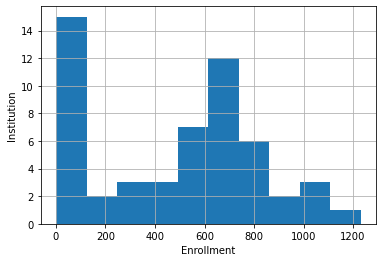

In [8]:
# Analyzing the enrollment
df_enrollment['Enrollment'].hist(bins=10) 
plt.xlabel("Enrollment")
plt.ylabel("Institution")
plt.rcParams['figure.figsize'] = [5,5] 
plt.show()

In [9]:
# Analyzing some statistics of enrollment
df_enrollment.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Enrollment,54.00,481.61,346.94,1.00,70.75,539.00,722.75,1230.00


In [10]:
# A categorical variable is created to deepen the analysis of attendance.
df_enrollment['School_size'] = pd.cut(x=df_enrollment['Enrollment'], bins=[0, 500, 1230], 
                                labels=['small institution','non-small institution'])

In [11]:
df_enrollment.head()

,Institution,Enrollment,School_size
0,Jamaica,887,non-small institution
1,Malaui,135,small institution
2,Mauricio,483,small institution
3,Guinea,1230,non-small institution
4,Yemen,53,small institution


The enrollment database needs to have cut-off date information. If the data needs to be updated, more or fewer students could be enrolled since enrollment is not constant. Outdated information could affect the estimation of attendance ratios.

**Recommendation**: Include the information's cut-off date, which should be close to the attendance information.

#### Analyzing the attendance

In [12]:
#Summary of attendance variables
df_attendance.describe()

C:\Users\COORDI~1\AppData\Local\Temp/ipykernel_16692/1503815828.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_attendance.describe()


,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
count,173106,173106,173052,173106,65155,97415,136352,173027,173106,173106
unique,38665,21359,146,85,2,3949,3,1134,28,2
top,83W1601496548T,Shaon,Senegal,2022-08-29 00:00:00,Period 1 (Morning),Grammar and Usage,Absence - Unexcused,Grade 7-A,Grade 8,Male
freq,16,411,8112,11639,33092,3177,102647,2193,22355,87188
first,NaN,NaN,NaN,2022-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_attendance['Institution'].value_counts()

Senegal           8112
Guinea            6884
Jamaica           6710
Níger             6422
Argelia           6280
                  ... 
Vietnam             16
Uzbekistán          14
Timor Oriental      10
Azerbaiyán          10
Bulgaria             8
Name: Institution, Length: 146, dtype: int64

"Institution" appears in both bases. It identifies a unique institution and will be used as a key variable for the join.

In [14]:
#Values of Attendance per day
df_attendance['Attendance Per Day'].value_counts()

Period 1 (Morning)      33092
Period 2 (Afternoon)    32063
Name: Attendance Per Day, dtype: int64

In [15]:
#Values of Absence Type
df_attendance['Absence Type'].value_counts()

Absence - Unexcused    102647
Absence - Excused       31255
Late                     2450
Name: Absence Type, dtype: int64

In [16]:
#Values of Gender
df_attendance['Gender'].value_counts()

Male      87188
Female    85918
Name: Gender, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Absence - Unexcused'),
  Text(1, 0, 'Absence - Excused'),
  Text(2, 0, 'Late')])

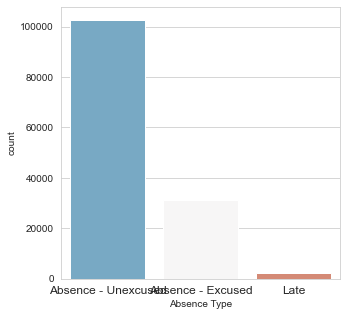

In [17]:
# Analizando la variable que representa el Tarjet del negocio (FlagAdj)


sns.set_style('whitegrid')
ax=sns.countplot(x='Absence Type',data=df_attendance,palette='RdBu_r')

plt.xticks(size=12)

#without_hue(ax,data.Absence Type)

<AxesSubplot:xlabel='count', ylabel='Education Grade'>

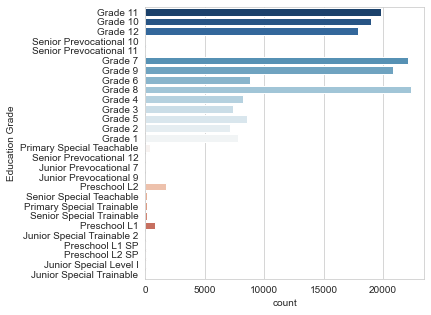

In [18]:
# Education Grade
sns.set_style('whitegrid')
sns.countplot(y='Education Grade',data=df_attendance,palette='RdBu_r')

In [19]:
#Values of Gender
df_attendance['Education Grade'].value_counts()

Grade 8                       22355
Grade 7                       22076
Grade 9                       20848
Grade 11                      19791
Grade 10                      18941
Grade 12                      17919
Grade 6                        8754
Grade 5                        8578
Grade 4                        8203
Grade 1                        7828
Grade 3                        7377
Grade 2                        7123
Preschool L2                   1717
Preschool L1                    792
Primary Special Teachable       354
Senior Special Teachable        110
Primary Special Trainable       110
Senior Special Trainable         98
Senior Prevocational 11          36
Preschool L1 SP                  25
Senior Prevocational 10          22
Senior Prevocational 12          16
Junior Prevocational 7           11
Preschool L2 SP                   9
Junior Special Level I            6
Junior Prevocational 9            4
Junior Special Trainable          2
Junior Special Trainable 2  

Reviewing information from (1) the [Bahamas government website](https://www.bahamas.gov.bs/wps/portal/public/gov/government/contacts/agencies/government%20departments/department%20of%20education/!ut/p/b1/vZTJbqNAEIafZR7AodnhyNosBmxo1osFxgtgDAo7Tz925hKNlMxoNEnXqaW_6qv_PxSWYBGW3NOxuKR90dzT2_OfMAcSQEsQKM6CNGCA7u-2wo7VCE6lsRCL3BjMcmNNshKOVePPUo2b8QnMsQIdNhf9SkEXfpxwppcNliT5LTsaKCluS-_YKBsCB-6M6Van9nDPrWUUh7ZZxdaVsxO0iiQMuV6DbY3LEYSRskaHYrm71ha4hhF1vHoO7DN0by1_1cvTIh-oTQ73471s2YIlyItGgNmeRcmRxjiSM05rOSEPCkuffjzMxQ9z4IMngD95_9X_gcCh_rL_3_khlnwmedvgTfAZ4tMJJoHFDwH7ToACAHQcCK6H7wHn0hjCIkAdvHJp9bVa3RJMOCp1oltFGyAfoFILbL9abT6xkZzsAMANhAIbKa1py4nZ9fIuD1xfFKSh9CXld6BDIP4BlHDG9GngQeKrgZB2uEcELNoJNAGA9O1A_KuA0LH20jNSJD4jJTVNYLYkB6jvBjL_HWhgSZHVL9OxfgEvBA9oDudIhmABR9BYUMbULHf624UChV_mYUzkF2o_FAKZ573uucvt2m37owt10dvXO5LnzwifjkarLj0dx3yOZ75zDruDQaiDeUKQCETG0gJxzzahxSeL2lUyeTUGwVqz-aSxt_mS8nZieXN_7azo1dWTqdkA0VTwDV5lKJdVb1qaND3TDJypFBbgaNwd5TAnEdMeZx_P1EmN50dewIqq47zNheCmVRHXlReyYC_j6yBsNr73yp1lgSJRBB4Xzdaa-oS19WiaW8bV1uhdnYSfJq7tDA!!/dl4/d5/L2dBISEvZ0FBIS9nQSEh/#:~:text=Education%20and%20Technical%20and%20Vocational%20Training%2C%20Ministry%20of&text=The%20primary%20level%20covers%20grades,(grades%2010%20-%2012)) and (2) a [UNESCO report on education in the Bahamas](http://www.ibe.unesco.org/fileadmin/user_upload/Inclusive_Education/Reports/kingston_07/bahamas_inclusion_07.pdf), a grade grouping variable can be created by levels. 

**From (1) Department of Education:**

> *Schools are categorized as follows:* 

> *Pre-School 4 to 5 years*

> *Primary 5 to 11+ years*

> *Junior High 11+ to 14+ years*

> *Senior High 14+ to 16+ years*

> *All - Age 5+ to 16+ years*

> *Special Schools All ages, catering to students having severe learning disabilities*

**From (2) UNESCO report:**

![Imagen](educ_system.png)



In [20]:
df_attendance['Grade level']=df_attendance['Education Grade']

In [21]:
df_attendance.loc[df_attendance['Education Grade']=='Grade 11', 'Grade level'] = "Secondary"

In [24]:
df_attendance.loc[df_attendance['Education Grade']=='Preschool L1', 'Grade level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L1 SP', 'Grade level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L2', 'Grade level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L2 SP', 'Grade level'] = "Pre-school"

df_attendance.loc[df_attendance['Education Grade']=='Grade 1', 'Grade level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 2', 'Grade level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 3', 'Grade level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 4', 'Grade level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 5', 'Grade level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 6', 'Grade level'] = "Primary"

df_attendance.loc[df_attendance['Education Grade']=='Grade 7', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 8', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 9', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 10', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 11', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 12', 'Grade level'] = "Secondary"

df_attendance.loc[df_attendance['Education Grade']=='Primary Special Teachable', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Primary Special Trainable', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Senior Special Teachable', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Senior Special Trainable', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Level I', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Trainable', 'Grade level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Trainable 2', 'Grade level'] = "Special"

df_attendance.loc[df_attendance['Education Grade']=='Junior Prevocational 7', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Junior Prevocational 9', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 10', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 11', 'Grade level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 12', 'Grade level'] = "Secondary"

df_attendance.loc[df_attendance['Education Grade'].isnull(), 'Grade level'] = "NaN"


In [ ]:
df_attendance.loc[df_attendance['Education Grade']==pd.isnull, 'Grade level'] = "NaN"

In [25]:
df_attendance

,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender,Grade level
0,83W2407401136T,Reyon,Angola,2022-09-14,NaN,Civics - 11G,NaN,Grade 11-G - Thurston & Wright,Grade 11,Male,Secondary
1,83W2407401136T,Reyon,Angola,2022-09-22,NaN,English Language- Gibson/K. Cooper,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male,Secondary
2,83W2407401136T,Reyon,Angola,2022-04-10,Period 1 (Morning),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male,Secondary
3,83W2407401136T,Reyon,Angola,2022-04-10,Period 2 (Afternoon),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male,Secondary
4,83W2407401136T,Reyon,Angola,2022-04-10,NaN,Mathematics- Daniels,Absence - Excused,Grade 11-G - Thurston & Wright,Grade 11,Male,Secondary
...,...,...,...,...,...,...,...,...,...,...,...
173101,83W2741860321T,Wiler,Canadá,2022-12-10,NaN,Creative Arts,NaN,Preschool L2-Gilbert,Preschool L2,Male,Pre-school
173102,83W2741860322T,StuST,Tayikistán,2022-09-27,Period 1 (Morning),NaN,Late,Grade 4 Wells,Grade 4,Male,Primary
173103,83W2741860325T,Samce,Panamá,2022-12-10,NaN,Grammar and Usage,NaN,Grade 3-Ra,Grade 3,Female,Primary
173104,83W2741860326T,Prion,Chile,2022-08-29,Period 2 (Afternoon),NaN,NaN,Preschool Unit Three,Preschool L2,Female,Pre-school


<AxesSubplot:xlabel='count', ylabel='Grade level'>

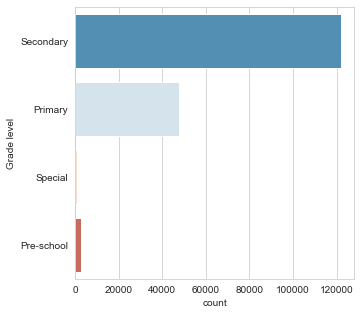

In [26]:
# Grade level
sns.set_style('whitegrid')
sns.countplot(y='Grade level',data=df_attendance,palette='RdBu_r')

**Attendance dictionary created from observation:**

Student ID: ID code that identifies a student.

Student: First name of the student.

Institution: The institution's name, in this case, is based on the name of the countries.

Date: Date of attendance record.

Attendance Per Day: Attendance period in morning (period 1) or afternoon (period 2).

Subjects: The subject matter of the attendance record.

Absence Type: Type of absence excused or unexcused.

Institution Class: name of student's class or section including grade level

Education Grade: Student's educational level.

Gender: Gender of the student (Male or Female).

**Enrollment dictionary created from observation:**

Institution: The institution's name, in this case, is based on the name of the countries. (Will be use to merge dataframes)

Enrollment: The number of students enrolled.

## 2. Diagnosis of the country’s current attendance and attendance rates

You must explain your calculation methods.

## 3. Assessment of the country’s current attendance and attendance rates evolution

Include some hypotheses to explain the country’s attendance and attendance trends and justify them using descriptive methods.

## 4. Estimated attendance and attendance trajectory

Justify the methodology used in the estimation and specify the bias assumed with the methodology chosen and justify the choice.
